In [8]:
import re

matches = re.compile(r'Loss: +([0-9.]+).+Learning Rate: +([0-9.e+-]+)')
for log in ['high_base', 'high_wp8k', 'low_base', 'low_wp8k']:
    with open(f'model_{log}.h5.log', 'r') as f:
        lines = f.readlines()
    data = []
    for line in lines:
        match = matches.search(line)
        if match:
            data.append((float(match.group(1)), float(match.group(2))))
    with open(f'loss_{log}.csv', 'w') as f:
        f.write('iter,loss,lr\n')
        for i, d in enumerate(data):
            f.write(f'{i},{d[0]},{d[1]}\n')



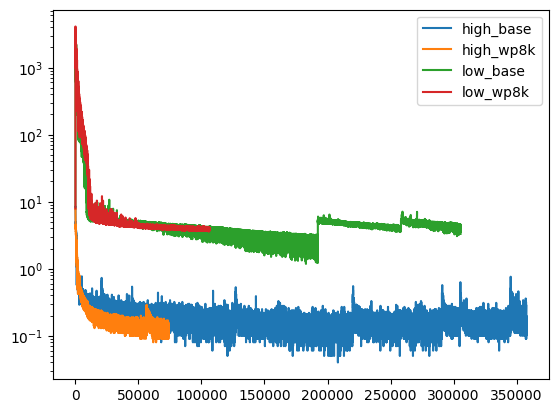

In [10]:
import pandas as pd
from matplotlib import pyplot

df = pd.read_csv('loss_high_base.csv')
pyplot.yscale("log")  
pyplot.plot(df['iter'], df['loss'], label='high_base')
df = pd.read_csv('loss_high_wp8k.csv')
pyplot.plot(df['iter'], df['loss'], label='high_wp8k')
df = pd.read_csv('loss_low_base.csv')
pyplot.plot(df['iter'], df['loss'], label='low_base')
df = pd.read_csv('loss_low_wp8k.csv')
pyplot.plot(df['iter'], df['loss'], label='low_wp8k')
pyplot.legend()

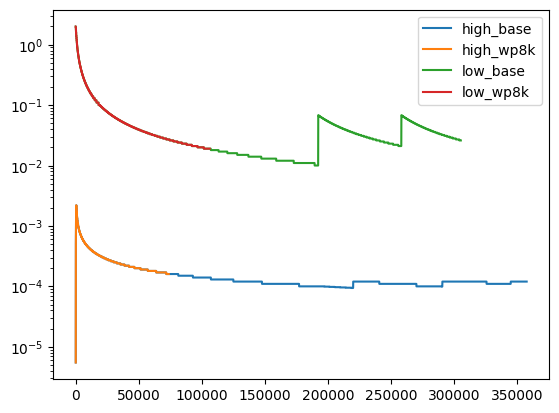

In [11]:
import pandas as pd
from matplotlib import pyplot

df = pd.read_csv('loss_high_base.csv')
pyplot.yscale("log")  
pyplot.plot(df['iter'], df['lr'], label='high_base')
df = pd.read_csv('loss_high_wp8k.csv')
pyplot.plot(df['iter'], df['lr'], label='high_wp8k')
df = pd.read_csv('loss_low_base.csv')
pyplot.plot(df['iter'], df['lr'], label='low_base')
df = pd.read_csv('loss_low_wp8k.csv')
pyplot.plot(df['iter'], df['lr'], label='low_wp8k')
pyplot.legend()